# Plot sMAPE

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
sys.path.append('/home/clb/AQP/')
from utils import load_table
src_df = load_table("lineitem")
print(src_df.shape)


(6001215, 8)


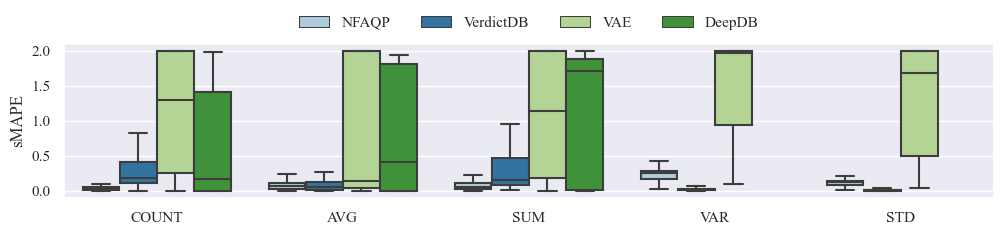

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
dataset = 'lineitem'
df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']

methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}

plot_df = pd.DataFrame([], columns=['Methods', 'Aggregation Functions', 'sMAPE'])

N = df.shape[0]
for m in methods:
    for f in funcs:
        if m == 'deepdb' and f in ['var', 'std']:
            continue
        err_col = df [f'{m}_{f}_err']
        sub_df = pd.DataFrame([[funcs_alias[f]] * N, [methods_alias[m]] * N, err_col]).transpose()
        sub_df.columns = plot_df.columns
        plot_df = pd.concat([plot_df, sub_df])

width = 12
ratio = 0.2
fig = plt.figure(figsize=(width, int(width * ratio)))
sns.set_style("ticks")
sns.set(font="Times New Roman")
ax = sns.boxplot(x="Methods", y="sMAPE",
                hue="Aggregation Functions", showfliers=False, palette="Paired",
                data=plot_df)
ax.set(xlabel=None)
sns.move_legend(ax, 'lower center', bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
# sns.despine(offset=10, trim=True)

plt.savefig(f"{dataset}_err.pdf", format="pdf", dpi=1200, bbox_inches="tight")

In [ ]:
dataset = 'lineitem'

df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
df['selectivity'] *= 100
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']
methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}
plot_df = pd.DataFrame([], columns=['Function', 'Selectivity', "Methods", 'sMAPE'])
upper = [100, 10, 1, 0.1]
lower = [10, 1, 0.1, 0.01]
for l, u in zip(lower, upper):
    print(l, u)
    idx = df['selectivity'].between(l, u)
    if idx.sum() <= 0:
        continue
    sel_df = df[idx].mean()

    for m in methods:
        for f in funcs:
            if f != 'sum':
                continue;
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = sel_df[f'{m}_{f}_err']
            sub_line = [[funcs_alias[f]] * 1, [u] * 1, [methods_alias[m]] * 1, [err_col] * 1]
            sub_df = pd.DataFrame(sub_line).transpose()
            sub_df.columns = plot_df.columns
            # print(sub_df)
            plot_df = pd.concat([plot_df, sub_df])
        

sns.lineplot(
    data=plot_df,
    x="Selectivity", y="sMAPE", hue="Methods", style="event",
    markers=True, dashes=False, ci=False
)

plt.savefig(f"{dataset}_sel.pdf", format="pdf", dpi=1200, bbox_inches="tight")


# Sel vs sMAPE

10 100 ['SUM', 2, 'NFAQP', 0.08017317244421461]
10 100 ['SUM', 2, 'VerdictDB', 0.12238544989574954]
10 100 ['SUM', 2, 'VAE', 0.5389947559338525]
10 100 ['SUM', 2, 'DeepDB', 0.8841308655200774]
1 10 ['SUM', 1, 'NFAQP', 0.09763303024536825]
1 10 ['SUM', 1, 'VerdictDB', 0.2987336249695681]
1 10 ['SUM', 1, 'VAE', 1.1850849342923147]
1 10 ['SUM', 1, 'DeepDB', 1.251057905131887]
0.1 1 ['SUM', 0, 'NFAQP', 0.1346220207561623]
0.1 1 ['SUM', 0, 'VerdictDB', 0.5823405736420698]
0.1 1 ['SUM', 0, 'VAE', 1.791419525698106]
0.1 1 ['SUM', 0, 'DeepDB', 1.2738199139369533]
0.01 0.1 ['SUM', -1, 'NFAQP', 0.13809845751140343]
0.01 0.1 ['SUM', -1, 'VerdictDB', 1.5454760958000155]
0.01 0.1 ['SUM', -1, 'VAE', 1.8329102934571477]
0.01 0.1 ['SUM', -1, 'DeepDB', 1.6132136666999988]
0.001 0.01 ['SUM', -2, 'NFAQP', nan]
0.001 0.01 ['SUM', -2, 'VerdictDB', nan]
0.001 0.01 ['SUM', -2, 'VAE', nan]
0.001 0.01 ['SUM', -2, 'DeepDB', nan]
0 0.001 ['SUM', -3, 'NFAQP', nan]
0 0.001 ['SUM', -3, 'VerdictDB', nan]
0 0.001 ['S

<AxesSubplot:xlabel='Selectivity', ylabel='sMAPE'>

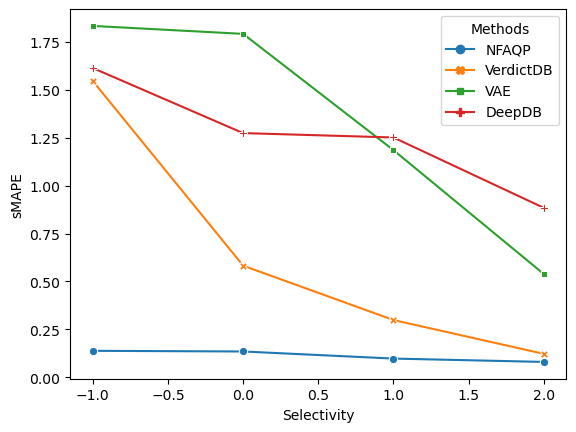

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataset = 'lineitem'
df = pd.read_csv(f'/home/clb/AQP/output/flow-tiny-{dataset}-spline/eval.csv')
df['selectivity'] *= 100
methods = ['flow', 'verdict', 'vae', 'deepdb']
funcs = ['cnt', 'avg', 'sum', 'var', 'std']
methods_alias = {a: b for a, b in zip(methods, ['NFAQP', 'VerdictDB', 'VAE', 'DeepDB'])}
funcs_alias = {a: b for a, b in zip(funcs, ['COUNT', 'AVG', 'SUM', 'VAR', 'STD'])}
plot_df = pd.DataFrame([], columns=['Aggregation Functions', 'Selectivity', "Methods", 'sMAPE'])
log_upper = [2, 1, 0, -1, -2, -3]
upper = [100, 10, 1, 0.1, 0.01, 0.001]
lower = [10, 1, 0.1, 0.01, 0.001, 0]
for l, u, log_up in zip(lower, upper, log_upper):
    
    # sel_df = df[df['selectivity'].between(l, u)].quantile(0.5)
    sel_df = df[df['selectivity'].between(l, u)].mean()
    for m in methods:
        for f in funcs:
            if f != 'sum':
                continue;
            if m == 'deepdb' and f in ['var', 'std']:
                continue
            err_col = sel_df[f'{m}_{f}_err']
            sub_line = [funcs_alias[f], log_up, methods_alias[m], err_col]
            print(l, u, sub_line)
            # sub_df = pd.DataFrame(sub_line).transpose()
            # sub_df.columns = plot_df.columns
            # plot_df = pd.concat([plot_df, sub_df])
            plot_df.loc[len(plot_df)] = sub_line


sns.lineplot(
    data=plot_df,
    x="Selectivity", y="sMAPE", hue="Methods", style="Methods",
    markers=True, dashes=False, ci=False
)

#plt.xticks(ticks=[0, 1, 2, 3], labels=['$10^0$', '$10^1$', '$10^2$', '$10^3$'])


In [22]:
plot_df

,Aggregation Functions,Selectivity,Methods,sMAPE
0,SUM,0.1,NFAQP,0.186478
1,SUM,0.1,VerdictDB,0.333775
2,SUM,0.1,VAE,1.937714
3,SUM,0.1,DeepDB,1.943248
4,SUM,0.1,NFAQP,0.071098
...,...,...,...,...
395,SUM,0.1,DeepDB,0.769795
396,SUM,0.1,NFAQP,0.093737
397,SUM,0.1,VerdictDB,0.300843
398,SUM,0.1,VAE,0.826393
